In [1]:
#!pip install newsapi-python
#https://newsapi.org/docs/endpoints/everything

from newsapi import NewsApiClient #importing the newsapi library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from string import punctuation
from nltk.corpus import stopwords
import re
import nltk
import numpy as np

In [3]:
#Running the python script containing API keys
%run C:\\Users\\korupos\\Documents\\Sentiment\\key.ipynb

In [4]:
x = "desantis"

In [5]:
#Initialize API
newsapi = NewsApiClient(api_key= news_api)

# /v2/sources
#sources = newsapi.get_sources()

# /v2/top-headlines
#top_headlines = newsapi.get_top_headlines(q='florida + vaccine',language='en', country = 'us')

# /v2/everything
all_articles = newsapi.get_everything(q= x, from_param='2021-04-11',
                                      to='2021-05-10', language='en', sort_by='relevancy', page=1, page_size = 100)


In [6]:
print(all_articles.keys())
print('Total articles : ' + str(all_articles['totalResults']))

dict_keys(['status', 'totalResults', 'articles'])
Total articles : 2695


In [7]:
all_articles

{'status': 'ok',
 'totalResults': 2695,
 'articles': [{'source': {'id': None, 'name': 'New York Times'},
   'author': 'Patricia Mazzei and Nick Corasaniti',
   'title': 'Florida Voting Rights: Republican Bill Adds New Limits',
   'description': 'The bill, which Gov. Ron DeSantis is expected to sign, is the latest Republican effort to restrict voting after the 2020 election. It will make Florida the first major swing state won by Donald Trump to pass such a law.',
   'url': 'https://www.nytimes.com/2021/04/29/us/politics/florida-voting-rights-bill.html',
   'urlToImage': 'https://static01.nyt.com/images/2021/04/29/us/politics/00florida-voting1/00florida-voting1-facebookJumbo.jpg',
   'publishedAt': '2021-04-30T01:05:16Z',
   'content': 'If the opposition says that we are creating barriers to voting, those barriers already exist in other states, said Blaise Ingoglia, a Republican state representative from Hernando County who helped l… [+1733 chars]'},
  {'source': {'id': None, 'name': 'N

In [9]:
#List of news sources 

# print('Total sources :' + str(len(sources['sources'])))
# print()
# for i in range(len(sources['sources'])):
#     print(i+1, sources['sources'][i]['name'])

In [10]:
news_df = pd.DataFrame(all_articles['articles'])

In [14]:
news_df[:1]

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'New York Times'}",Patricia Mazzei and Nick Corasaniti,Florida Voting Rights: Republican Bill Adds Ne...,"The bill, which Gov. Ron DeSantis is expected ...",https://www.nytimes.com/2021/04/29/us/politics...,https://static01.nyt.com/images/2021/04/29/us/...,2021-04-30T01:05:16Z,If the opposition says that we are creating ba...


## GCP NLP API

In [15]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= "C:\\Users\\korupos\\Documents\\Sentiment\\senti-311518-1b03476e63cd.json"

In [16]:
# Imports the Google Cloud client library
from google.cloud import language_v1

In [17]:
# Instantiates a client
client = language_v1.LanguageServiceClient()

In [18]:
senti = []
for i in news_df['title']:
    text = i
    document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
    sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment
    senti.append(round(sentiment.score, 2))

In [19]:
news_df['sentiment_score'] = senti

In [20]:
news_df.to_csv('newsAPI.csv',index=False,encoding='utf-8')

In [22]:
pos = news_df[news_df.sentiment_score > 0]
neg = news_df[news_df.sentiment_score < 0]
neu = news_df[news_df.sentiment_score == 0]

## Results

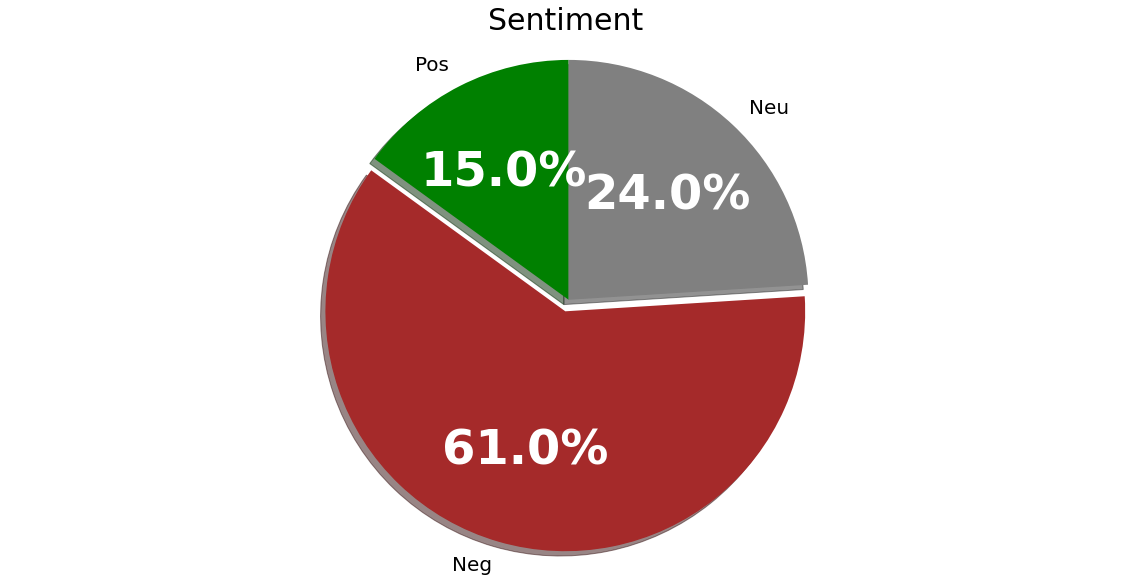

In [23]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Pos', 'Neg', 'Neu'
sizes = [len(pos), len(neg), len(neu)]
colors = 'green','brown','grey'

explode = (0, 0.05, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(20,10))
_, _, autopcts = ax1.pie(sizes, explode=explode, labels=labels, colors = colors, autopct='%1.1f%%', shadow=True, startangle=90,
       textprops={'fontsize': 20})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':48})
ax1.set_title('Sentiment', fontdict={'fontsize': 30})

plt.show()

In [24]:
pos.sort_values(by=['sentiment_score'], inplace=True, ascending = False)
neg.sort_values(by=['sentiment_score'], inplace=True)

<ipython-input-24-17f8801a99d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos.sort_values(by=['sentiment_score'], inplace=True, ascending = False)
<ipython-input-24-17f8801a99d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg.sort_values(by=['sentiment_score'], inplace=True)


In [26]:
pos[['title', 'sentiment_score']].head(10)

,title,sentiment_score
62,Legal Lawyers in (puppy) love - Reuters,0.9
0,Florida Voting Rights: Republican Bill Adds Ne...,0.4
1,"Crist Enters Race to Face DeSantis, With More ...",0.4
38,GOP White House Hopefuls Make Moves As Trump M...,0.4
54,Florida Republicans give DeSantis wins for 202...,0.4
65,Florida's Crist becomes first prominent Democr...,0.4
82,Liberals for Ron DeSantis*,0.4
29,Trump tells Republican donors he'll help win C...,0.2
50,Trump vows to help Republicans take back congr...,0.2
58,'A nicer version of Trump': GOP donors flock t...,0.2


In [27]:
neg[['title', 'sentiment_score']].head(10)

,title,sentiment_score
95,"Senate ready to consider police reform bill, w...",-0.7
57,DeSantis tears into YouTube over claims of cen...,-0.7
13,Florida officials push back against governor's...,-0.7
73,Miami senator tried to bar schools from bannin...,-0.7
22,Sponsor of effort to undermine Key West’s vote...,-0.7
25,Norwegian Cruise Line threatens to skip Florid...,-0.7
37,Florida gov signs GOP voting law critics call ...,-0.6
33,Florida Gov. Ron DeSantis denies systemic raci...,-0.6
32,DeSantis says he’ll sign bill banning transgen...,-0.6
8,"Stripped of mandates, Miami-Dade urging ‘commo...",-0.6


## News distribution

Model 1 : GCP


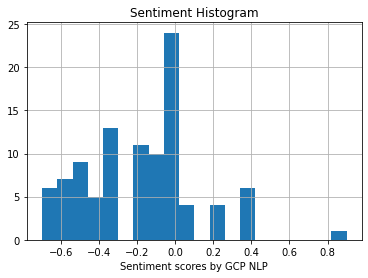

Total Tweets : 100
Neutral Tweets : 24
Positive Tweets : 15
Negative Tweets : 61


In [30]:
print('Model 1 : GCP')
news_df['sentiment_score'].hist(bins=20)
plt.title('Sentiment Histogram')
plt.xlabel('Sentiment scores by GCP NLP')
plt.show()
print('Total Tweets : ' + str(len(news_df)))
print('Neutral Tweets : ' + str((news_df['sentiment_score'] == 0).sum()))
print('Positive Tweets : ' + str((news_df['sentiment_score'] > 0).sum()))
print('Negative Tweets : ' + str((news_df['sentiment_score'] < 0).sum()))

# Ignore the code below

## Cleaning

In [70]:
# blobs = []                #This list holds the cleaned tweets

# for i in range(len(news_df)):
#     title = news_df['title'][i]
#     title = title.strip(punctuation).lower()
#     title = re.sub(r'http\S+', ' ', title)
#     title = re.sub(r'@\S+', ' ', title)
#     title = re.sub(r'#', '', title)
#     title = re.sub(r'[^a-z]+', ' ', title)
#     title = re.sub(r'rt', ' ', title)
    
#     blobs.append(title)

## Model 1 : TextBlob

In [71]:
# polarity = []
# subjectivity = []

# for i in range(len(blobs)):
#     xyz = TextBlob(blobs[i])
#     polarity.append(xyz.sentiment.polarity)
#     subjectivity.append(xyz.sentiment.subjectivity)

In [72]:
# news_df['Polarity'] = polarity
# news_df['subjectivity'] = subjectivity

In [74]:
# news_df['Polarity'].mean()

0.07161598124098123

## Model 2 : Vader

In [80]:
# analyzer = SentimentIntensityAnalyzer()
# sentiment = {}
# pol = [0]*len(news_df)
    
# for i in range(len(news_df)):
#     title = news_df['title'][i]
#     sentiment[i] = analyzer.polarity_scores(title)
#     pol[i] = sentiment[i]['compound']
# news_df['Polarity_1'] = pol

## Results

Model 1 : TextBlob


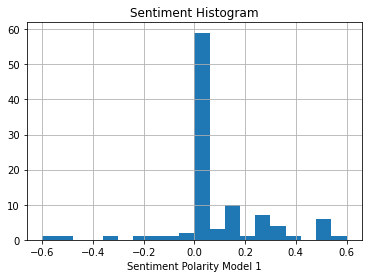

Total Titles : 100
Neutral Titles : 59
Positive Titles : 33
Negative Titles : 8


In [77]:
# print('Model 1 : TextBlob')
# news_df['Polarity'].hist(bins=20)
# plt.title('Sentiment Histogram')
# plt.xlabel('Sentiment Polarity Model 1')
# plt.show()
# print('Total Titles : ' + str(len(news_df)))
# print('Neutral Titles : ' + str((news_df['Polarity'] == 0).sum()))
# print('Positive Titles : ' + str((news_df['Polarity'] > 0).sum()))
# print('Negative Titles : ' + str((news_df['Polarity'] < 0).sum()))

Model 2 : Vader


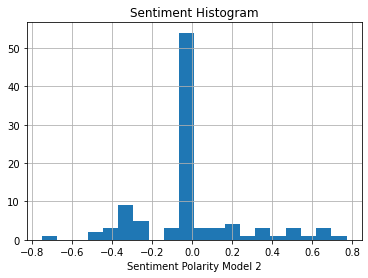

Total Titles : 100
Neutral Titles : 53
Positive Titles : 23
Negative Titles : 24


In [81]:
# print('Model 2 : Vader')
# news_df['Polarity_1'].hist(bins=20)
# plt.title('Sentiment Histogram')
# plt.xlabel('Sentiment Polarity Model 2')
# plt.show()
# print('Total Titles : ' + str(len(news_df)))
# print('Neutral Titles : ' + str((news_df['Polarity_1'] == 0).sum()))
# print('Positive Titles : ' + str((news_df['Polarity_1'] > 0).sum()))
# print('Negative Titles : ' + str((news_df['Polarity_1'] < 0).sum()))

In [92]:
# for i in range(len(news_df)):
#     if news_df['Polarity'][i] > 0:
#         print(news_df['title'][i])

Republicans' Rich White Friends Will Outlive Us All
As Republicans Shun Vaccines, Congress Toils to Return to Normal
Ducey announces plan to open COVID-19 vaccine registration to 55 and older - KVOA Tucson News
FEMA vaccine site abandoned state rules, gave vaccine to any resident 18 and older
San Francisco expands who can get COVID-19 vaccine under new rules - KCRA Sacramento
U.S. Study Finds AstraZeneca’s Vaccine to Be 79% Effective
New Yorker spends her free time helping others book COVID vaccine appointments - Reuters
New Yorker spends her free time helping others book COVID vaccine appointments - Reuters
Florida COVID update for Thursday: 5,773 cases, 107 deaths as more than 10% get vaccinated
Here’s how people 18 and older can get on a COVID-19 vaccine wait list in Florida
Florida Sunday COVID update: 36 deaths, each person a resident, and 4,943 new cases
The Latest: WH: Vaccine doses to increase to 15.2M a week - The Associated Press
At least four GOP senators haven't been vaccin